In [22]:
%load_ext autoreload
%autoreload 2

import logging
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
%matplotlib inline

import unissono.datasets.ibge
from unissono.datasets.ibge import Variable, in_path

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

unissono.datasets.ibge.download()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


found 1044.73


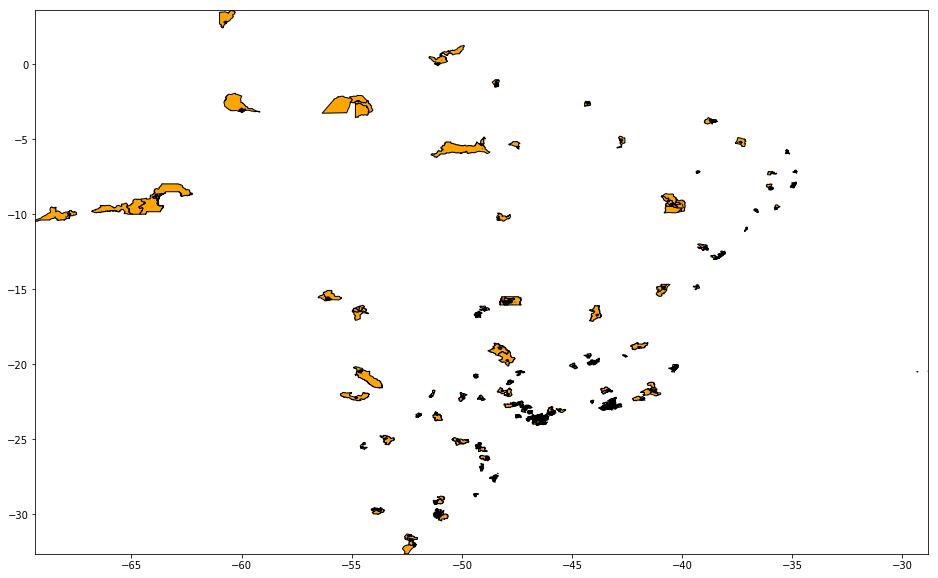

In [24]:
income = unissono.datasets.ibge.load_variable(Variable.MONTHLY_AVERAGE_INCOME)
polys = income["3304557005122"]["shapes"]

def get_path(shp):
    verts = []
    codes = []
    for lat, lng in shp:    
        verts.append((lng, lat))
        codes.append(Path.LINETO)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    return Path(verts, codes)

def get_boundary(shp):
    lats, lngs = zip(*shp)
    return (min(lats), max(lats), min(lngs), max(lngs))

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
min_lat, max_lat, min_lng, max_lng = 100, -100, 100, -100
for code, data in income.items():
    polys = data["shapes"]
    for i in range(len(polys)):
        path = get_path(polys[i])
        if in_path(polys[i], -20.032976,-43.9953748):
            patch = patches.PathPatch(path, facecolor='blue', lw=1)
            print("found", income[code]["value"])
        else:
            patch = patches.PathPatch(path, facecolor='orange', lw=1)
        ax.add_patch(patch)
        ma, xa, mn, xn = get_boundary(polys[i])
        if ma < min_lat: min_lat = ma
        if xa > max_lat: max_lat = xa
        if mn < min_lng: min_lng = mn
        if xn > max_lng: max_lng = xn
ax.set_xlim(min_lng,max_lng)
ax.set_ylim(min_lat,max_lat)
plt.show()

In [26]:
unissono.datasets.ibge.get_variable(income, -20.032976,-43.9953748)

('3106200005004', 1044.73)